# Dealing with Data Spring 2020 – Class 9

---

# Why Databases?

> Size <br>
> Scale <br>
> Security <br>
> Easy to Make Insertions, Deletions, and Updates

# Entity Relationship Diagrams (ERDs): 

...graphically present the relationships between entities. For example:

![ERD Example](https://online.visual-paradigm.com/repository/images/73785425-47d6-4273-8b89-b2b9622af30f.png)

An `entity` is a collection of objects with the same properties (e.g., 'Student'or 'Examination'). Entities are descriptions of `instances` (e.g., 'John Doe', '1833449', 'Business')

A `primary key` is an attribute whose value is unique in each instance (e.g., 'SID')

A `composite primary key` is a primary key that consists of two or more attributes, whose values together (but not separately) are unique for each instance of an entity (e.g., SectionNum and CourseNo)

A `relationship` describes an assocation between entities (e.g., a Student takes a Course). 

`Cardinalities` describe the number of instances that participate in a relationship. For example: 

- A student may take 0, 1, or more ('many') courses
- A course can be taken by 0, 1, or more ('many') students

<br> 

![Cardinality Notation](https://user-images.githubusercontent.com/2719310/29148000-7c8d3dd8-7d1f-11e7-9e91-2caf5074f6af.png)

# One-to-One Relationships

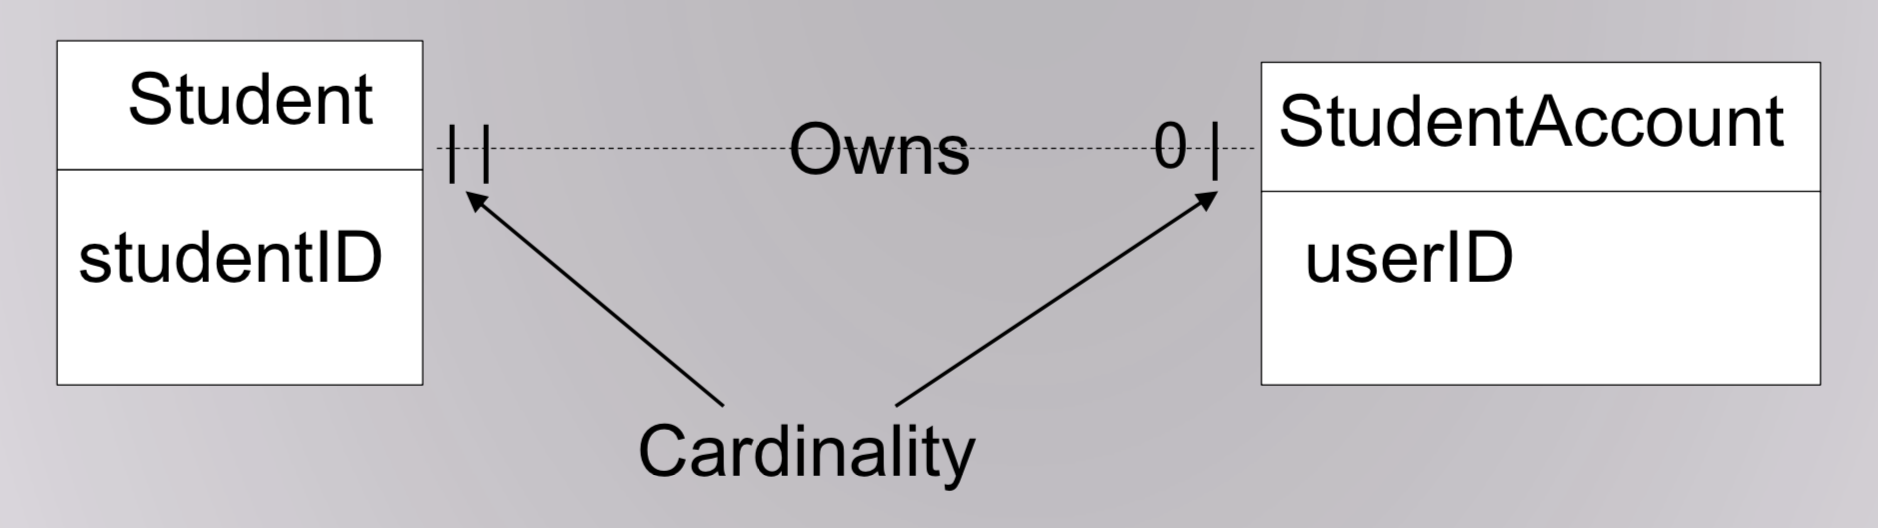

> Each student can own zero or one (expressed as "0 |") account <br>
> Each account is owned by exactly one (expressed as "||" student) 

# One-to-Many Relationships

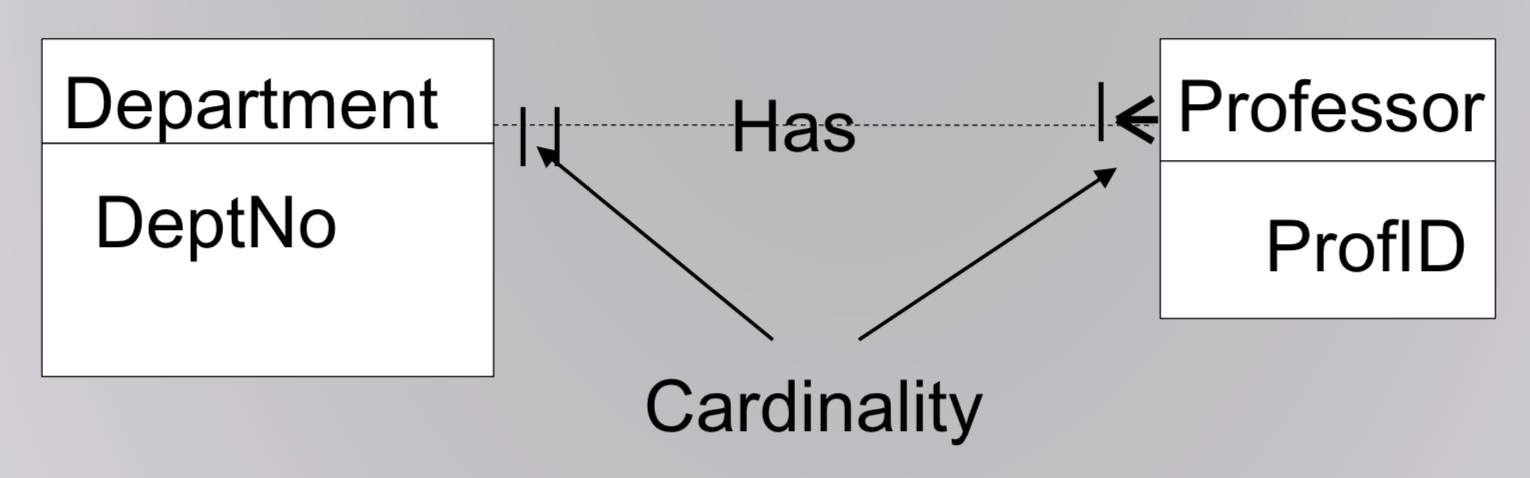

> Each department can have one or more (expressed as |E") professors <br> 
> Each professor is affiliated with one and only one (expressed as "||") department

# Many-to-Many Relationships

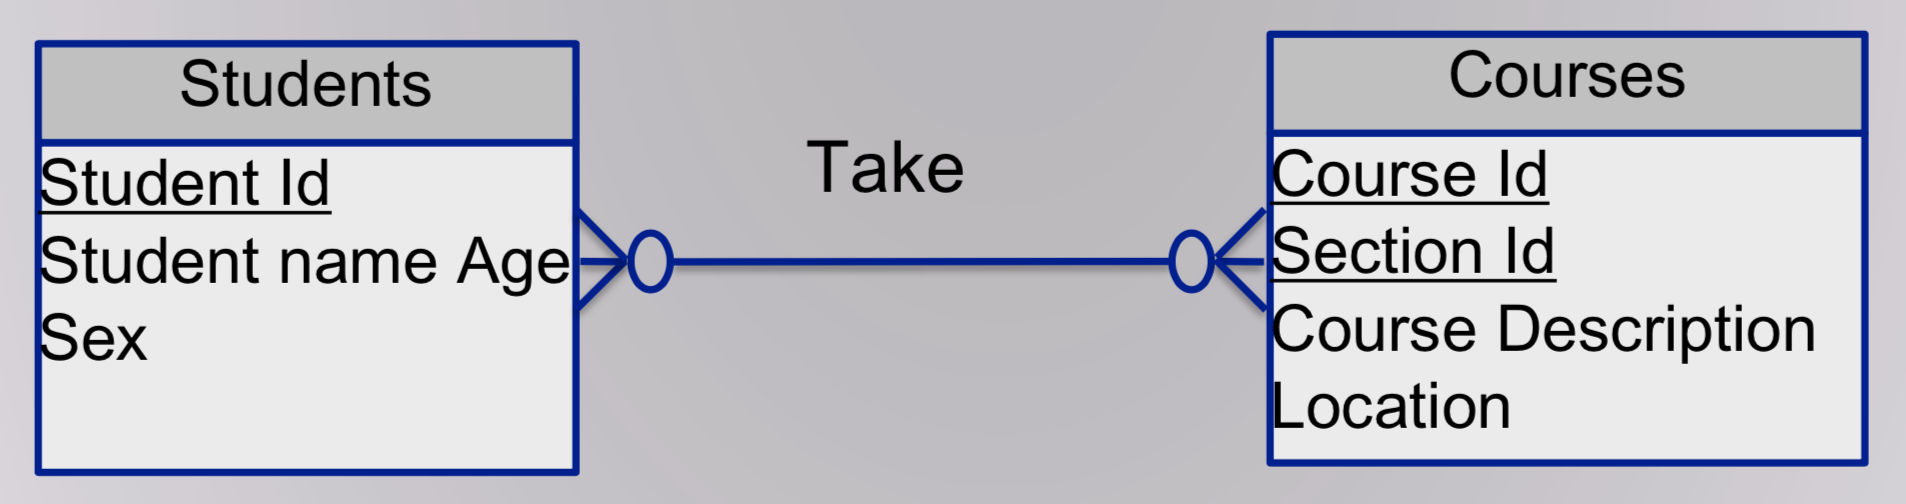

> Each student can take 0 or more courses <br> 
> Each course can enroll 0 to many students

---

# From Narrative to ERD

1. Identify `entities` and `attributes`
> look for nouns that describe people, places, things (those are your entities) 
> then, look for details about those entities (those are your attributes) 
2. Define the `primary keys`
> these should be stable, and each entity should only have one primary key
3. Identify `relationships` and determine `cardinalities`
4. Refine and iterate



---

> An `entity` maps to a `table` <br> <br>
> Each `attribute` maps to a `column` in that table <br> <br>
> The `primary key` of the entity maps to the `primary key` of the table

---

# Building a Data Pipeline

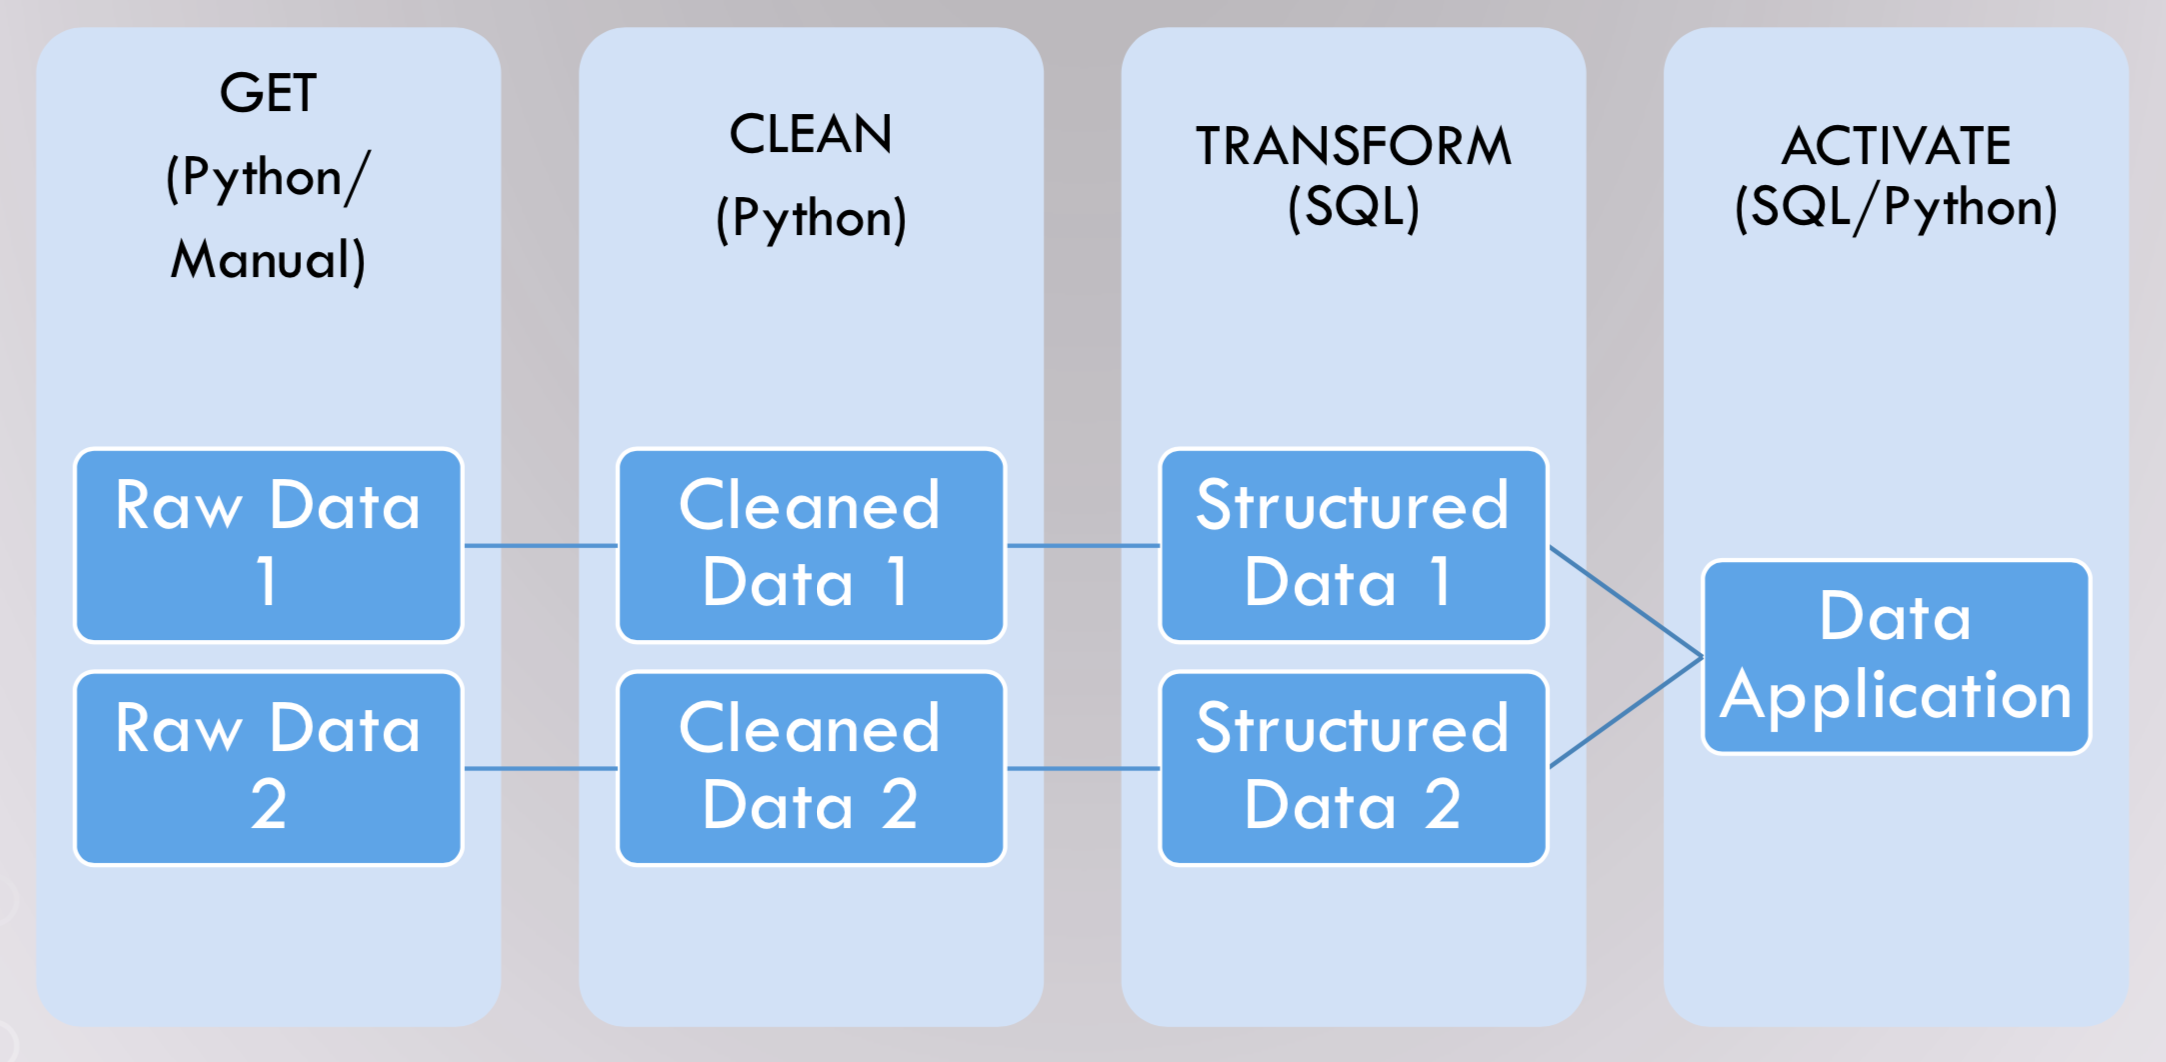

---

# Users

Our users are the [Commissioner for NYC's Media & Entertainment Agency](https://www1.nyc.gov/site/mome/index.page)

# Decision Problem

When making daily decisions around reviewing film permit requests in NYC, the office now needs to consider how to best create a balanced media representation of NYC's diversity. 

# Data Assistance Requirements

Describe neighborhood characteristics of past film permits to best inform future decisions.

# Application Type

`Descriptive`: the agency needs to start with an understanding of the neighborhoods shown in previously issued permits

# Our Data

Our `nyc_film_permits.csv` originated from the City of New York [(link here)](https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p) and was transformed for ease of use in our class. 

Our `irs_nyc_tax_returns.csv` originated from the IRS [(link here)](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi) and was transformed for ease of use in our class. 

Our `nyc_census_data.csv` originated from Census.gov [(link here)](https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t) and was transformed for ease of use in our class. 

Our `irs_agi_map.csv` was produced manually by Guthrie Collin after reading IRS documentation. 

---

# SQLite Studio

[DOWNLOAD](https://github.com/pawelsalawa/sqlitestudio/releases)

In [26]:
# SEE PDF FOR INSTRUCTIONS

# NB: 

1. We use `NOT NULL` to specify that a relationship has a minimum cardinality of one, 
2. We use `UNIQUE` to specify that a relationship has a maximum cardinality of one.

---

# SELECT

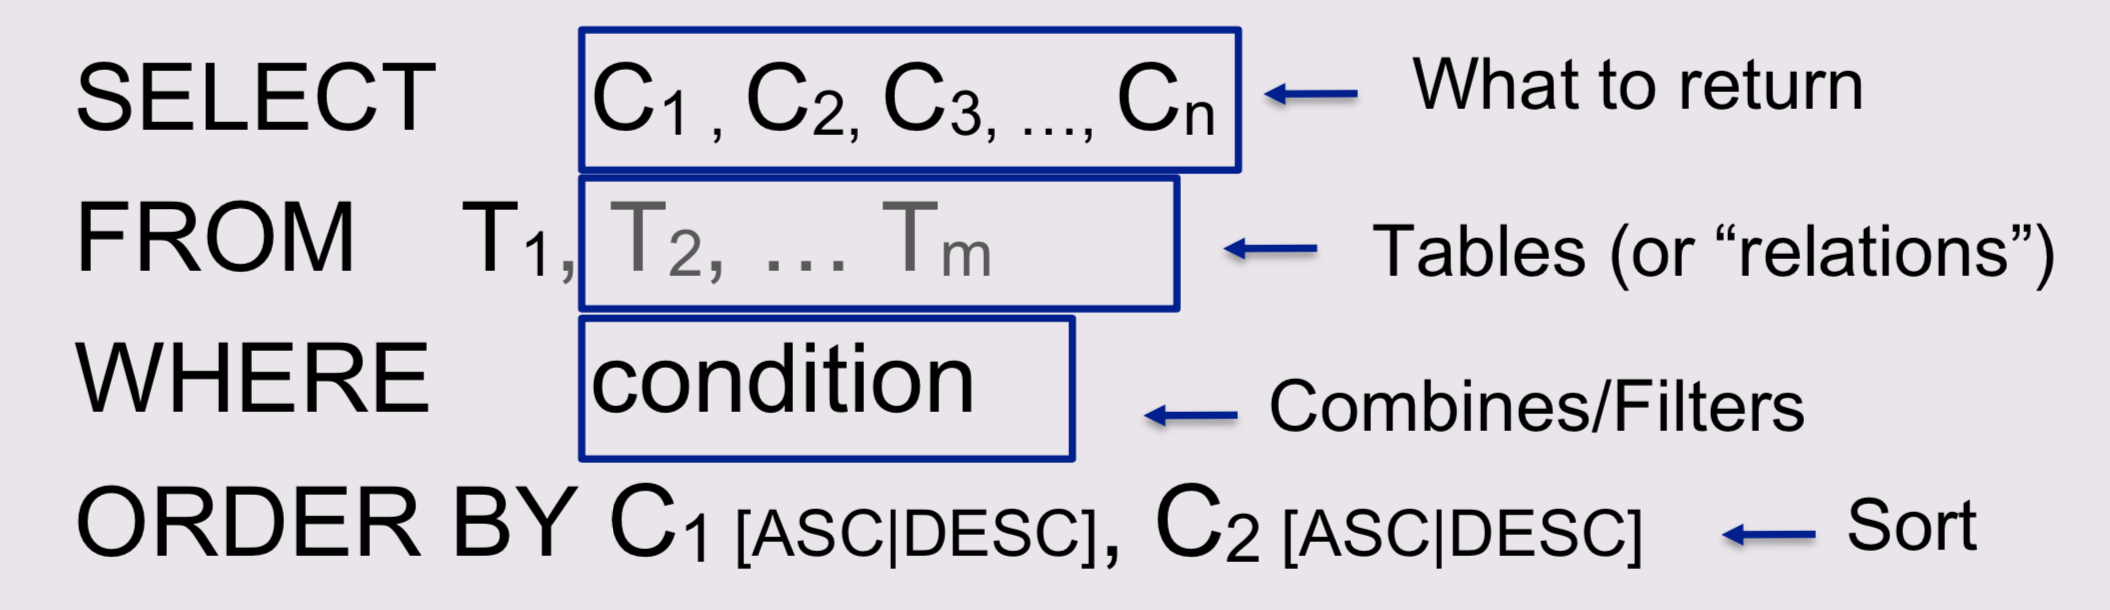

``` SQL 
SELECT * 
FROM irs_agi_map
```

``` SQL
SELECT * 
FROM irs_nyc_tax_returns
```

```SQL
SELECT state, zipcode 
FROM irs_nyc_tax_returns
```

```SQL
SELECT year, state, zipcode, return_count 
FROM irs_nyc_tax_returns
```

# AS

Sometimes we want to rename a column to provide a more descriptive name in the results

```SQL 
SELECT year, state, zipcode, return_count as tax_returns 
FROM irs_nyc_tax_returns
```

```SQL
SELECT year, state, return_count as 'tax returns' 
FROM irs_nyc_tax_returns
```

# ORDER BY 

Used to sort the result row based on attribute values

# LIMIT

Limits the number of rows in the result

```SQL
SELECT DISTINCT year,zipcode AS 'zip code' 
FROM irs_nyc_tax_returns LIMIT 5;
```

```SQL
SELECT DISTINCT year,zipcode AS 'zip code' 
FROM irs_nyc_tax_returns
ORDER BY year DESC
LIMIT 5;
```

```SQL 
SELECT DISTINCT year, zipcode AS 'zip code' 
FROM irs_nyc_tax_returns
ORDER BY year DESC, zipcode ASC
LIMIT 5;
```

# WHERE

Defines which rows will appear in the results

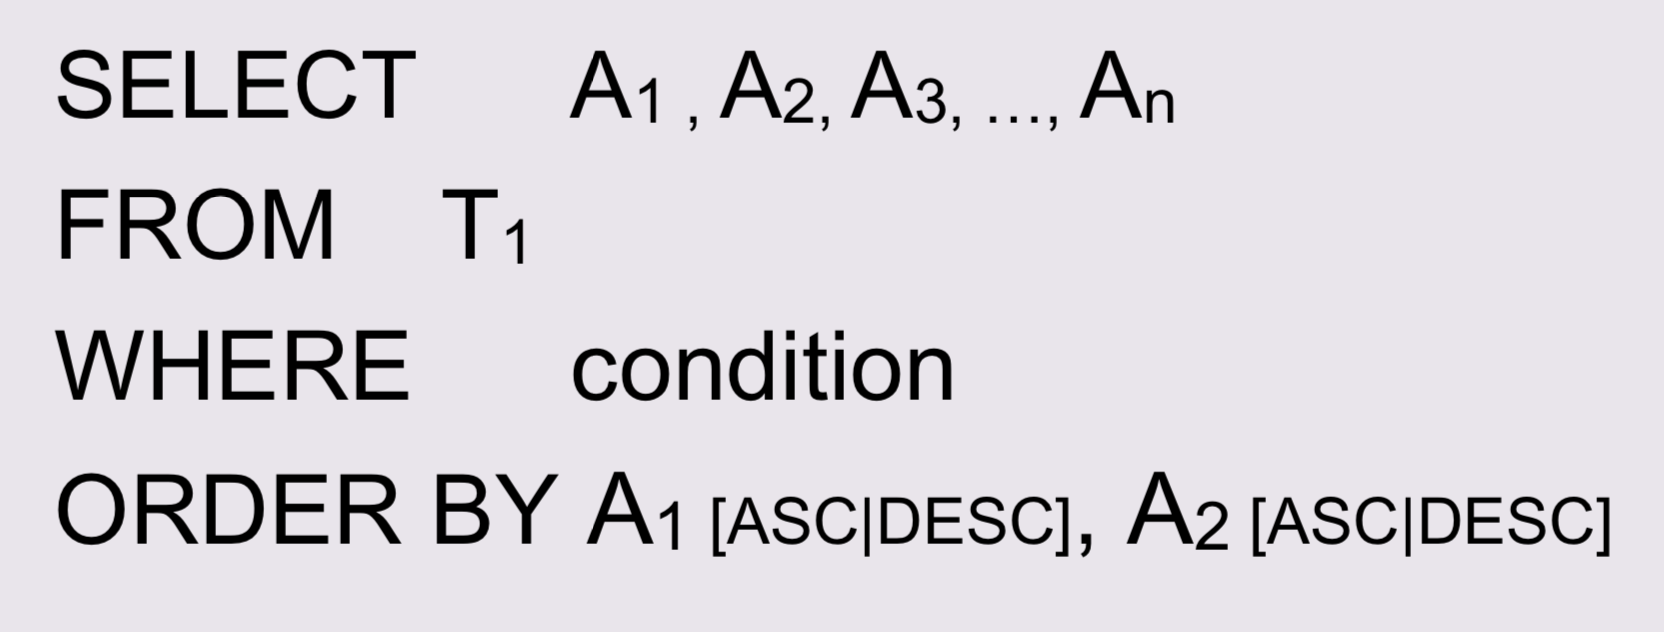

# Conditions for WHERE Clauses:

`attr = 'text'/number` means 'attribute is equal to' (either a text value or numerical value) <br>
`attr != value` or `attr <> value` means 'attribute is *not equal to* value' <br>
`attr > value` means 'attribute is greater than value' <br>
`attr < value` means 'attribute is less than value' <br>
`attr >= value` means 'attribute is greater than or equal to value' <br>
`attr <= value` means 'attribute is less than or equal to value' <br>
`attr IN (x1,x2,x3,...)` means 'attribute value is either x1, x2, or x2, or ...' <br> 
`attr NOT IN (x1,x2,x3,...)` means 'attribute value is not x1, nor x2, nor x3,...' <br>
`condition1 AND condition2` means 'both conditions should hold' <br>
`condition1 OR condition1` means 'at least one of the conditions should hold' <br>


```SQL
SELECT * 
FROM irs_nyc_tax_returns 
WHERE (zipcode = "10001");
```

```SQL
SELECT * 
FROM irs_nyc_tax_returns 
WHERE (zipcode = 10001 AND return_count > 4000) OR (agi_map_id = 2 AND year = 14);
```

```SQL 
SELECT return_count 
FROM irs_nyc_tax_returns 
WHERE zipcode IN ("10128") AND year IN ("2012");
```

```SQL
SELECT * 
FROM irs_nyc_tax_returns 
WHERE zipcode NOT IN (10001,10002,10128);
```

```SQL
SELECT return_count 
FROM irs_nyc_tax_returns 
WHERE zipcode IN ("10128") AND year IN ("2012") 
ORDER BY agi_map_id DESC;
```

# DISTINCT

Used to eliminate duplicates in results

```SQL
SELECT DISTINCT year 
FROM irs_nyc_tax_returns
```

```SQL
SELECT DISTINCT year, zipcode as 'zip code' 
FROM irs_nyc_tax_returns
```

# Other Operators

`AS` is used to change the name of a column in the result <br> 
`DISTINCT` means 'no duplicate rows' <br>
`ORDER BY` lets you sort by column(s) in ascending or descending order <br>
`*` means 'select all columns' <br>
`IS NULL` returns rows that have null values for a specified attribute <br>
`IS NOT NULL` returns rows that do not have null values for a specified attribute <br>
`BETWEEN` returns something like, 'between *this* value and *that* value'


---

# In-Class Exercise: 

> Work in pairs to draft an ERD for our in-class exercise.

https://www.draw.io/

`Neighborhoods` are within a Borough, and can be located by `Zip Code`, containing Buildings and their resident businesses and people. <br> 

`Filming Permits` are for a specific medium, and take place in a `Neighborhood` for a specific time period and require a permit from the city. A Neighborhood's buildings and residents are shown in the result. <br> 

`Neighborhood Resident Demograhpics` describe their diverse families and living accommodations. <br> 

`Neighborhood Resident Tax Incomes` describe their incomes. 

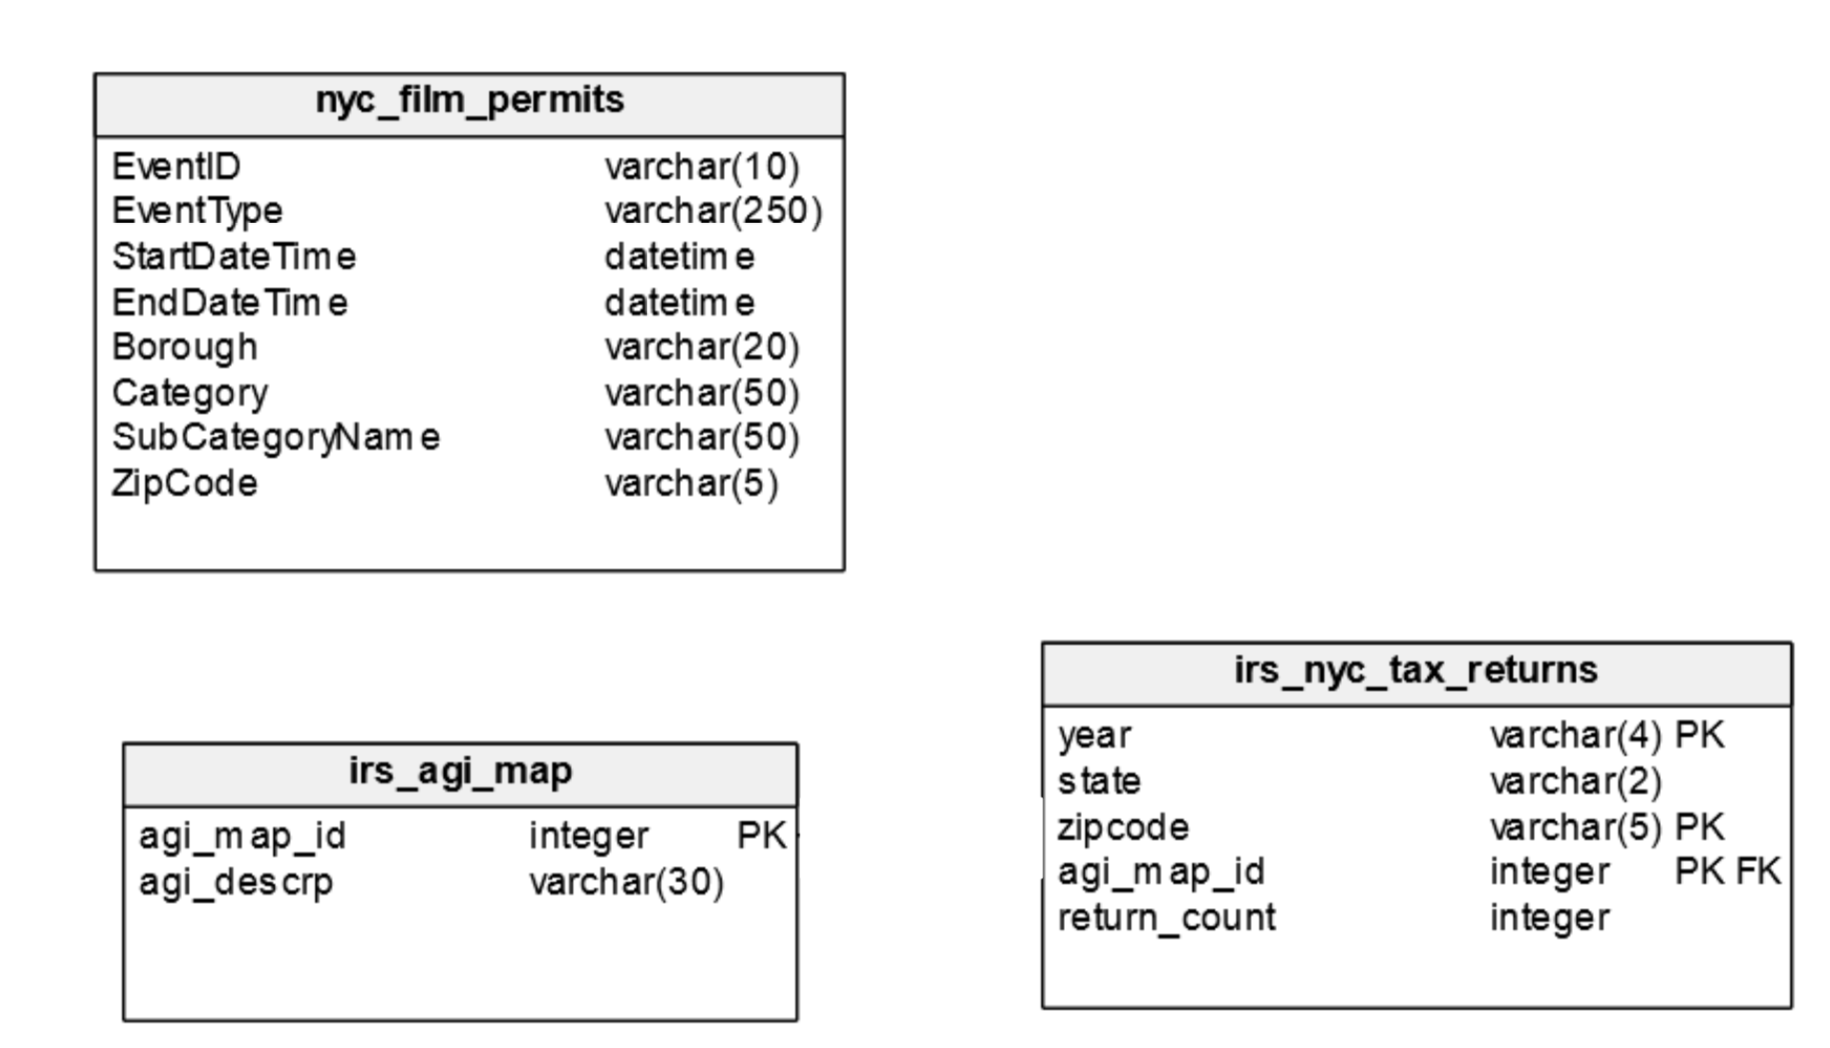

---

# Solution

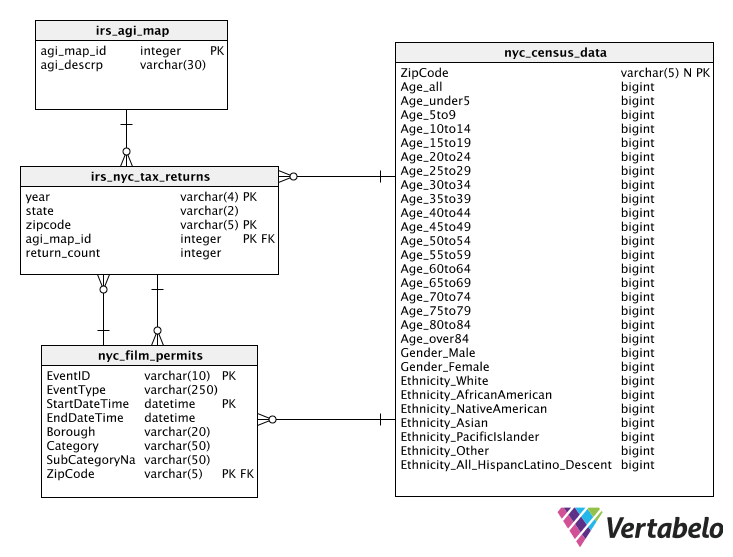

---